In [2]:
import sys
sys.path.append('/home/kal/TF_models/bin/')
import numpy as np
import matplotlib.pyplot as plt
import eval_TFmodel
import sequence
import train_TFmodel
import viz_sequence
import seq_only_gen
import helper

Using TensorFlow backend.
/home/kal/TF_models/bin/sequence.py:275: RuntimeWarning: divide by zero encountered in log
  self.seq = helper.softmax(np.log(dist))


In [3]:
#load a model and grab a sequence
reg = eval_TFmodel.TFmodel('/home/kal/TF_models/seq_only/seq_regression/20170920_regression_model/')
# get the generator
gen = seq_only_gen.TFGenerator('/home/kal/TF_models/seq_only/seq_regression/encode_TFs/20180316_140558_CTCF/CTCF_gen.hdf5')
g = gen.pos_gen(mode='val')
validation_data = next(g)
print('Score: ' + str(validation_data[1]))
seq = sequence.SeqDist(sequence.encode_to_onehot(validation_data[0]))

Score: 185


/home/kal/TF_models/bin/sequence.py:243: RuntimeWarning: divide by zero encountered in log
  self.seq = helper.softmax(np.log(distribution))


Discrete Sequence passed - converting to a distibution via pseudocount
Initial Sequence


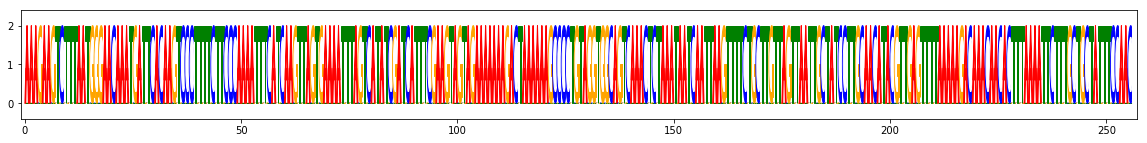

Model Prediction: 582.9509
Masked average prediciton difference


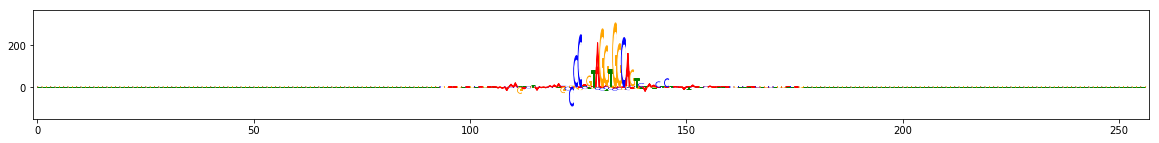

Information Content of Softmax prediction difference


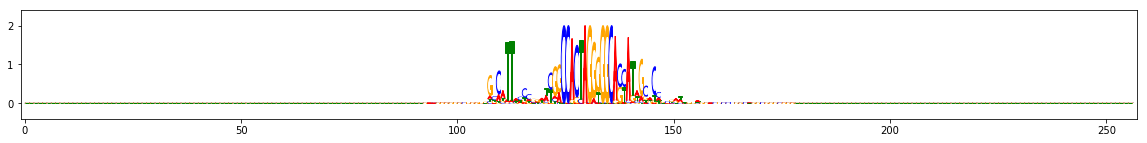

Weighted log-odds of the Sequence Distribution


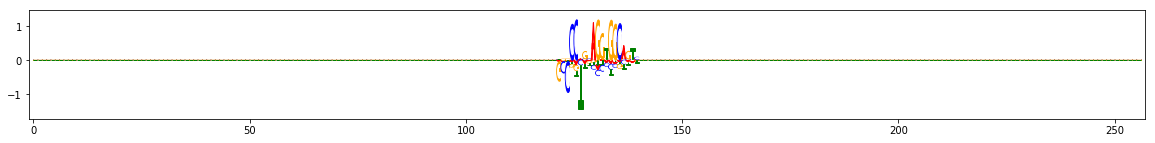

PWM score: 3.4828708575140035
Sequence after 0 iterations


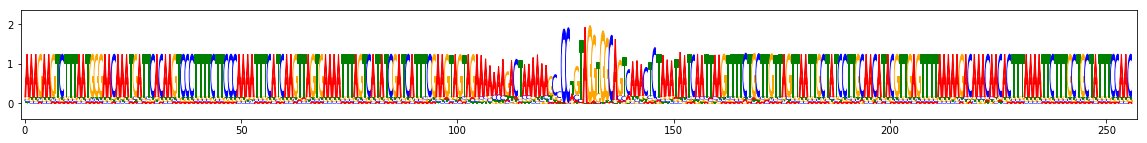

Sequence after 2 iterations


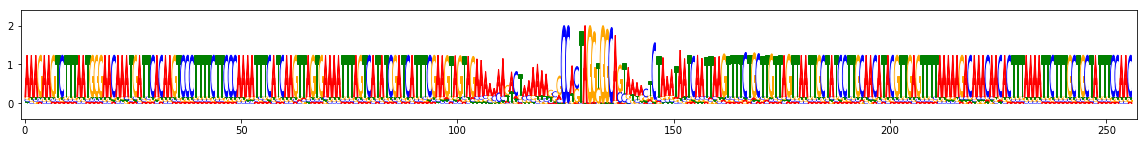

Sequence after 4 iterations


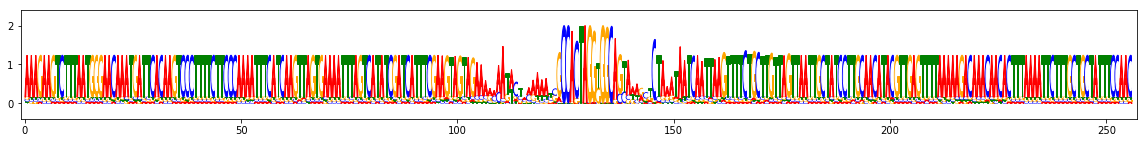

Sequence after 6 iterations


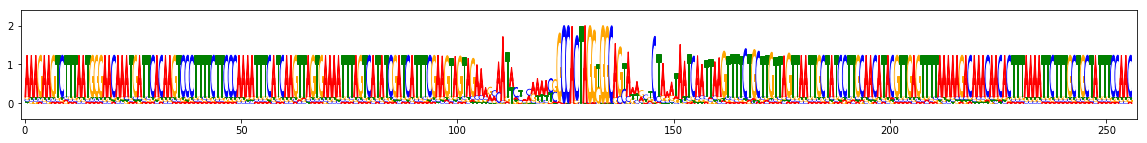

Sequence after 8 iterations


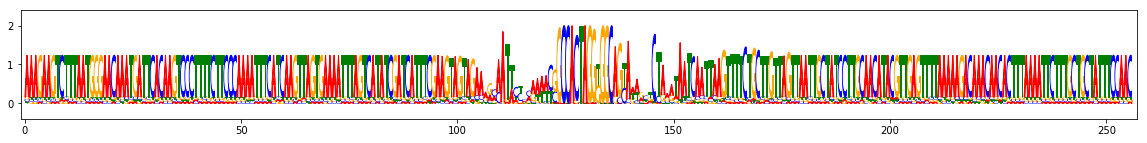

Final sequence


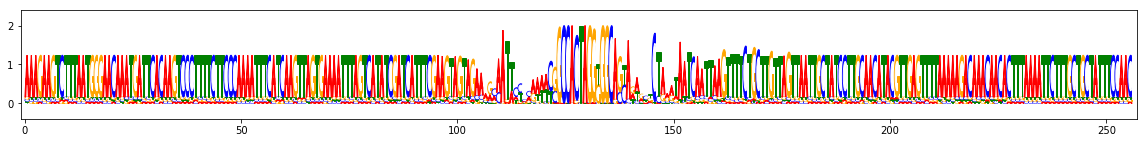

Model Prediction: 1421.5884
Masked average prediciton difference


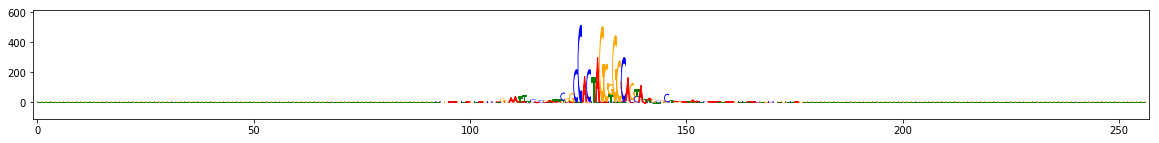

Information Content of Softmax prediction difference


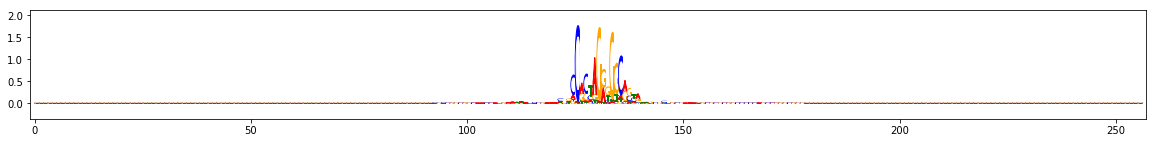

Weighted log-odds of the Sequence Distribution


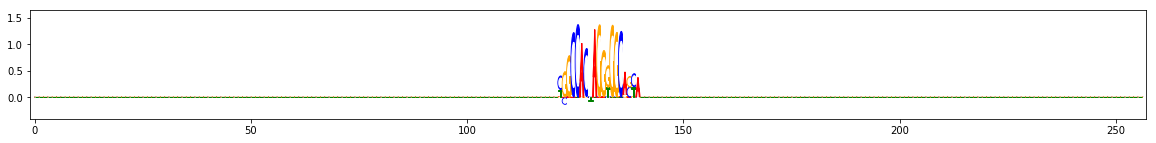

PWM score: 15.57332890415346


In [7]:
dream = reg.gumbel_dream(seq, 'standard', num_iterations=10, viz=1, step=.01)

Inital
Masked average prediciton difference


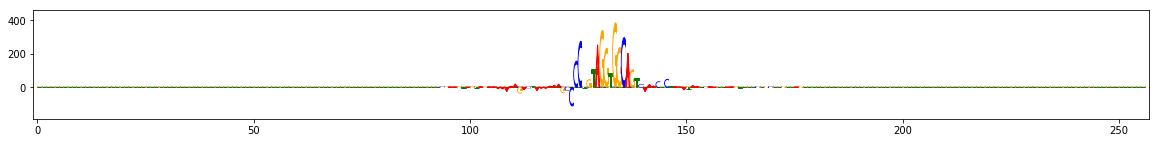

Information Content of Softmax prediction difference


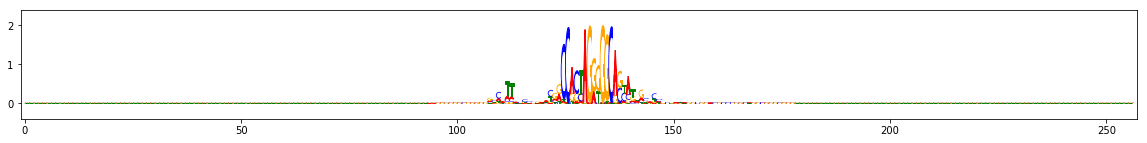

Final
Masked average prediciton difference


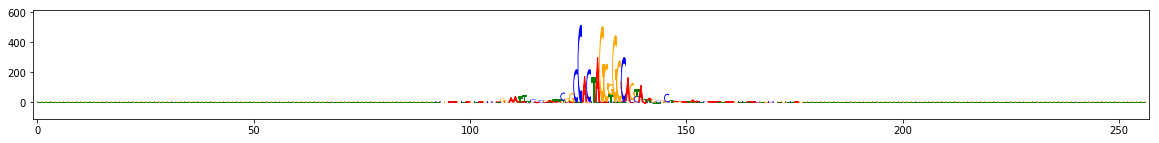

Information Content of Softmax prediction difference


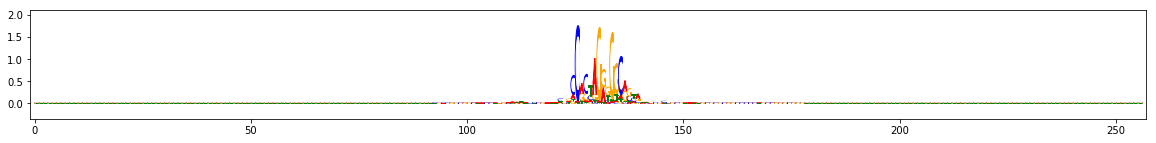

Net Change


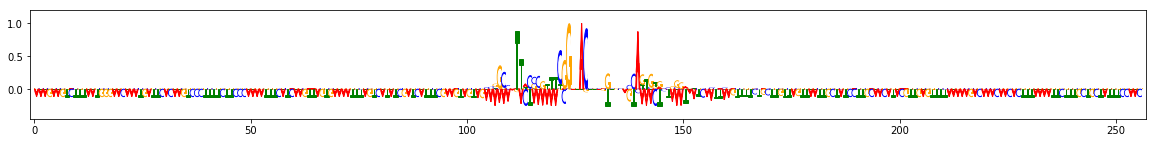

In [12]:
print('Inital')
reg.get_importance(seq, viz=True)
print('Final')
reg.get_importance(dream, viz=True)
print('Net Change')
viz_sequence.plot_weights((dream.seq-seq.seq)*dream.seq)

Discrete Sequence passed - converting to a distibution via pseudocount
Step 0.004764907202966899
Initial Sequence


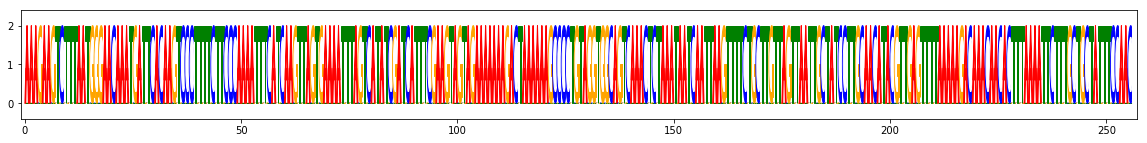

Model Prediction: 60.637596
Masked average prediciton difference


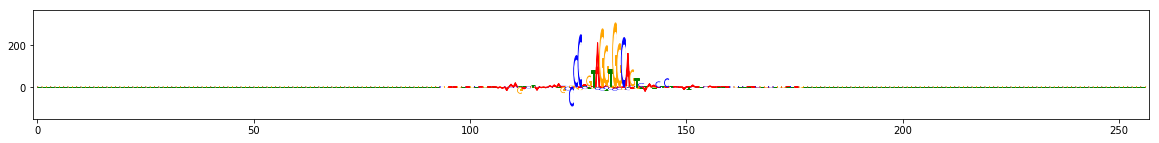

Information Content of Softmax prediction difference


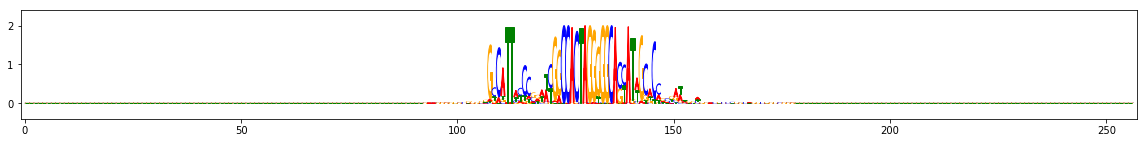

Weighted log-odds of the Sequence Distribution


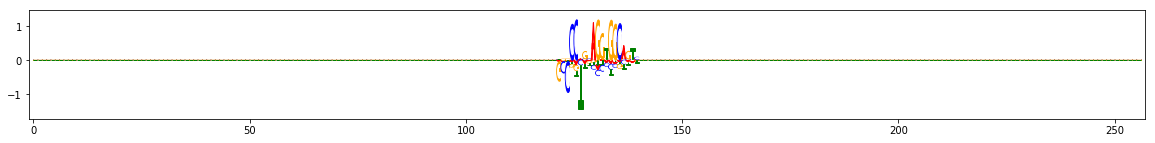

PWM score: 3.4828708575140035
Sequence after 0 iterations


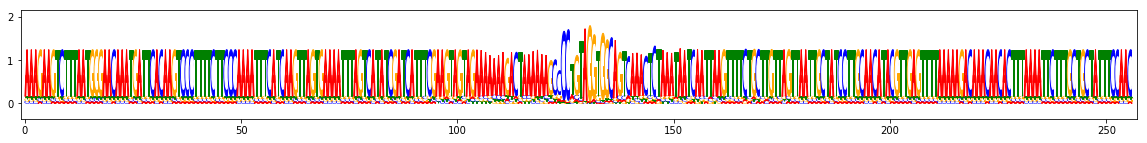

Sequence after 5 iterations


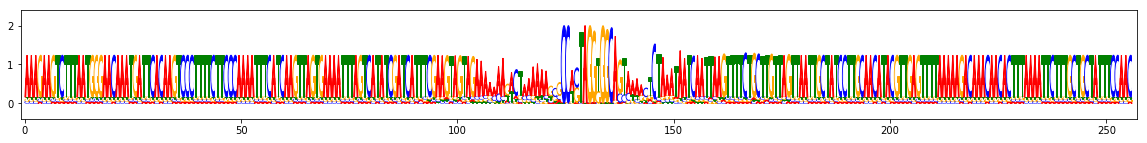

Sequence after 10 iterations


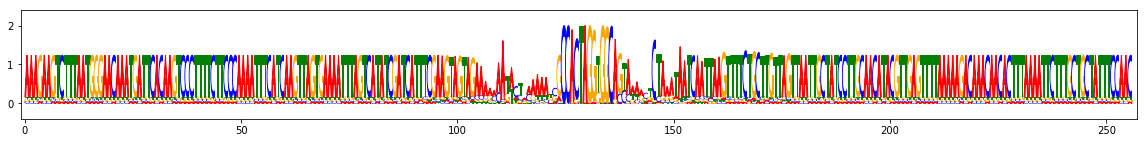

Sequence after 15 iterations


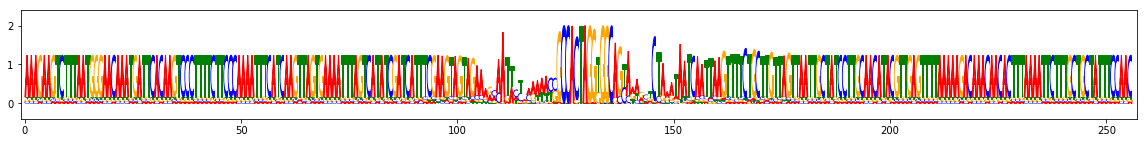

Final sequence


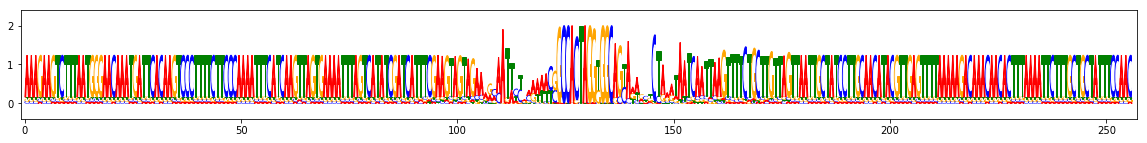

Model Prediction: 1376.0205
Masked average prediciton difference


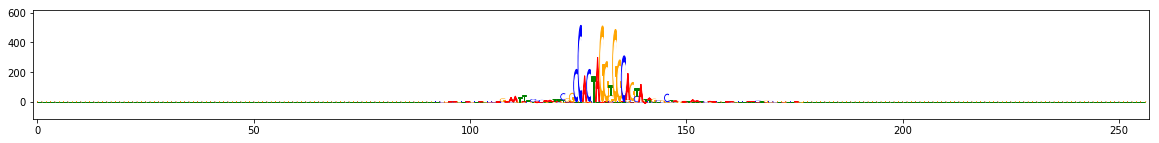

Information Content of Softmax prediction difference


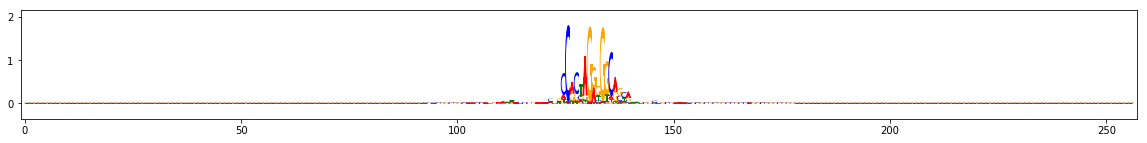

Weighted log-odds of the Sequence Distribution


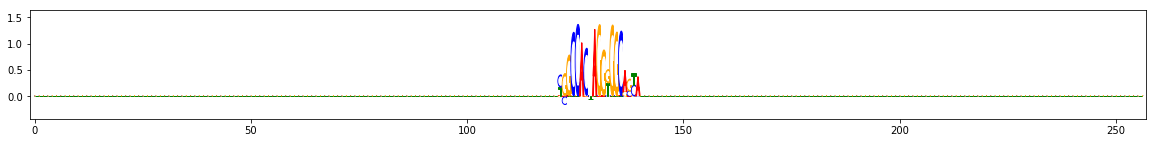

PWM score: 15.329447117909224


In [13]:
dream = reg.gumbel_dream(seq, 'adverse', viz=True)

In [ ]:
# types of dreams:
#standard: update is average gradient @ base * p(base) * step
#adversarial: update is standard - 1/10 * step
#blocked: dream only outside the pwm region (should I allow the max pwm to move around? doesn't currently.)
#constrained: dream orthogal to the pwm score (DOESN'T WORK)
#strict: gradients only apply to a base if that base was in the discrete sequence chosen. 

In [ ]:
dream = sigmodel.dream(seq, viz=False, num_iterations = 40)

print('initial sequence')
seq.logo()
print('Bias Activation: ' + str(sigmodel.get_activation(seq)))
print('Model Prediction: ' + str(sigmodel.model.predict(train_TFmodel.blank_batch(seq.discrete_seq()))[0][0]))
sigmodel.get_importance(seq, viz=True)
print('PWM score: ' + str(seq.find_pwm(viz=True)[2]))

print('final sequence')
dream.logo()
print('Bias Activation: ' + str(sigmodel.get_activation(dream)))
print('Model Prediction: ' + str(sigmodel.model.predict(train_TFmodel.blank_batch(dream.discrete_seq()))[0][0]))
sigmodel.get_importance(dream, viz=True)
print('PWM score: ' + str(dream.find_pwm(viz=True)[2]))

In [ ]:
dream = sigmodel.dream(seq, viz=False, num_iterations = 40, step=1)

print('initial sequence')
seq.logo()
print('Bias Activation: ' + str(sigmodel.get_activation(seq)))
print('Model Prediction: ' + str(sigmodel.model.predict(train_TFmodel.blank_batch(seq.discrete_seq()))[0][0]))
sigmodel.get_importance(seq, viz=True)
print('PWM score: ' + str(seq.find_pwm(viz=True)[2]))

print('final sequence')
dream.logo()
print('Bias Activation: ' + str(sigmodel.get_activation(dream)))
print('Model Prediction: ' + str(sigmodel.model.predict(train_TFmodel.blank_batch(dream.discrete_seq()))[0][0]))
sigmodel.get_importance(dream, viz=True)
print('PWM score: ' + str(dream.find_pwm(viz=True)[2]))